<a href="https://colab.research.google.com/github/andrejuniorba/Analises_estudos/blob/main/An%C3%A1lise_de_boas_a%C3%A7%C3%B5es_pagadoras_de_dividendos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabela retirada do site 
https://www.fundamentus.com.br/resultado.php

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt



# Obtenção e armazenamento dos dados

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dados - Data Science/ACOES_empresas.csv')

In [3]:
#Configurar para mostrar todas as colunas
pd.set_option('max_columns',23)
#Apresentando as 5 primeiras linhas do Dataframe
df.head()

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
0,LWSA3,"6,94","-1441,35","1,39","4,613","0,00%","0,886","2,94","190,41","8,04","122,49","22,95","2,42%","-0,32%","2,75","0,71%","-0,10%",145163000,2941450000,"0,03","47,96%"
1,ELMD3,"15,4","-1326,62","2,83","4,618","0,00%","1,406","7,54","46,52","-13,58","47,46","18,3","9,93%","-0,35%","1,87","4,90%","-0,21%",3102910,760772000,"0,69","111,77%"
2,SCAR3,32,"-360,29","1,19","6,66","0,45%","0,531","-6,73","13,7","-1,12","26,87","19,19","48,62%","-2,28%","0,49","3,96%","-0,33%",162567,1551380000,"1,19","-13,01%"
3,BRPR3,"9,14","-357,52","0,61","13,25","1,15%","0,383","18,47","20,5","-1,33","30,3","30,04","64,63%","-3,71%","1,31","2,02%","-0,17%",24444200,7072250000,"0,41","-7,43%"
4,RAIL3,"15,87","-333,09",2,"3,725","0,12%","0,658","6,7","17,48","-1,45","23,82","11,11","21,30%","-1,10%","1,87","4,47%","-0,60%",168181000,14706100000,"1,16","5,85%"


Temos 467 papéis para nossa análise.

In [4]:
#Vericando a quantidade de linhas e colunas
df.shape

(467, 21)

Veja que ao verificar os tipo de dados do nosso Dataframe, encontramos várias "Strings" não sendo ideal em nossa análise. Sendo assim, será preciso convertê-los para o tipo numérico "float".

In [5]:
#Verificando os tipos de dados
df.dtypes

Papel               object
Cotação             object
P/L                 object
P/VP                object
PSR                 object
Div.Yield           object
P/Ativo             object
P/Cap.Giro          object
P/EBIT              object
P/AtivCirc.Liq      object
EV/EBIT             object
EV/EBITDA           object
Mrg Ebit            object
Mrg. Líq.           object
Liq. Corr.          object
ROIC                object
ROE                 object
Liq.2meses          object
Patrim. Líq          int64
Dív.Brut/Patrim.    object
Cresc. Rec.5a       object
dtype: object

# Transformação de dados

In [6]:
#Converter os dados numéricos em tipo float
for coluna in ['Cotação','P/L','P/VP','PSR','P/Ativo','P/Cap.Giro','P/EBIT','P/AtivCirc.Liq','EV/EBIT','EV/EBITDA','Liq. Corr.','Liq.2meses','Dív.Brut/Patrim.']:
#Para cada coluna deverá substituir a vírgula pelo ponto e converter o dado para float
  df[coluna] = df[coluna].apply(lambda x: str(x).replace(',','.'))
  df[coluna] = df[coluna].astype('float64')

In [7]:
#Converter os dados de porcentagem em tipo float (decimal)
for coluna_porcento in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC' , 'ROE', 'Cresc. Rec.5a']:
#Para cada coluna deverá substituir a vírgula pelo ponto, retirar o símbolo de porcentagem e converter o dado para float (divide por 100 para apresentar em decimal)
  df[coluna_porcento] = df[coluna_porcento].apply(lambda x: str(x).replace(',','.'))
  df[coluna_porcento] = df[coluna_porcento].str.rstrip('%')
  df[coluna_porcento] = df[coluna_porcento].astype('float64') / 100

Aqui já podemos verificar que as transformações dos respectivos dados foram bem sucedidas.

In [8]:
df.dtypes

Papel                object
Cotação             float64
P/L                 float64
P/VP                float64
PSR                 float64
Div.Yield           float64
P/Ativo             float64
P/Cap.Giro          float64
P/EBIT              float64
P/AtivCirc.Liq      float64
EV/EBIT             float64
EV/EBITDA           float64
Mrg Ebit            float64
Mrg. Líq.           float64
Liq. Corr.          float64
ROIC                float64
ROE                 float64
Liq.2meses          float64
Patrim. Líq           int64
Dív.Brut/Patrim.    float64
Cresc. Rec.5a       float64
dtype: object

In [9]:
df.head()

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
0,LWSA3,6.94,-1441.35,1.39,4.613,0.0000,0.886,2.94,190.41,8.04,122.49,22.95,0.0242,-0.0032,2.75,0.0071,-0.0010,145163000.0,2941450000,0.03,0.4796
1,ELMD3,15.40,-1326.62,2.83,4.618,0.0000,1.406,7.54,46.52,-13.58,47.46,18.30,0.0993,-0.0035,1.87,0.0490,-0.0021,3102910.0,760772000,0.69,1.1177
2,SCAR3,32.00,-360.29,1.19,6.660,0.0045,0.531,-6.73,13.70,-1.12,26.87,19.19,0.4862,-0.0228,0.49,0.0396,-0.0033,162567.0,1551380000,1.19,-0.1301
3,BRPR3,9.14,-357.52,0.61,13.250,0.0115,0.383,18.47,20.50,-1.33,30.30,30.04,0.6463,-0.0371,1.31,0.0202,-0.0017,24444200.0,7072250000,0.41,-0.0743
4,RAIL3,15.87,-333.09,2.00,3.725,0.0012,0.658,6.70,17.48,-1.45,23.82,11.11,0.2130,-0.0110,1.87,0.0447,-0.0060,168181000.0,14706100000,1.16,0.0585


# Análises:

1. Dividend Yield (DY)

2. Margem Líquida

3. ROE (Retorno sobre o patrimônio líquido)

4. Dívida Bruta / Patrimônio Líquido

5. Liquidez Corrente

6. Índice Preço/Lucro (P/L)

7. Preço da ação / Valor Patrimonial por Ação (P/VPA)

8. Valor da firma / Lucro antes de Juros, impostos, depreciação e amortização (EV/EBITDA)

# Análise e Limpeza dos dados

#  **Dividend Yield (DY)**

* DY = (total em proventos em dinheiro [últimos 12 meses] ÷ preço atual da ação) x 100

* É um indicador que mede quanto a empresa paga aos seus investidores em dividendos e outros proventos em dinheiro. 

* Quanto maior for o DY, maior será o pagamento de dividendos daquela empresa. 


Inicialmente vamos filtrar as ações que são pagadoras de dividendos.

In [10]:
filtro = df['Div.Yield'] > 0

In [11]:
df_dividendos = df[filtro]

Após aplicação do filtro podemos perceber que só restaram as ações que pagam dividendos.

In [12]:
df_dividendos.head()

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
2,SCAR3,32.00,-360.29,1.19,6.660,0.0045,0.531,-6.73,13.70,-1.12,26.87,19.19,0.4862,-0.0228,0.49,0.0396,-0.0033,162567.0,1551380000,1.19,-0.1301
3,BRPR3,9.14,-357.52,0.61,13.250,0.0115,0.383,18.47,20.50,-1.33,30.30,30.04,0.6463,-0.0371,1.31,0.0202,-0.0017,24444200.0,7072250000,0.41,-0.0743
4,RAIL3,15.87,-333.09,2.00,3.725,0.0012,0.658,6.70,17.48,-1.45,23.82,11.11,0.2130,-0.0110,1.87,0.0447,-0.0060,168181000.0,14706100000,1.16,0.0585
11,DASA3,18.99,-60.11,1.41,0.952,0.0155,0.434,31.85,46.77,-1.04,74.80,13.97,0.0204,-0.0152,1.05,0.0111,-0.0234,8675320.0,7573560000,1.23,0.3481
94,APER3,35.37,0.00,1.80,3.246,0.0020,1.008,15.07,0.00,-5.77,0.00,0.00,0.0000,0.0000,1.34,0.0000,0.0000,1368910.0,298664000,0.00,0.1519


De 467 papéis restaram 308

In [13]:
df_dividendos.shape

(308, 21)

# **Margem Líquida**

* O resultado é apresentado sempre em termos percentuais.
LUCRO LÍQUIDO / RECEITA LÍQUIDA = MARGEM LÍQUIDA

* Uma margem líquida alta indica que a empresa está conseguindo converter boa parte da receita em lucro líquido. Isso pode acontecer, por exemplo, com empresas que conseguem manter seus custos baixos ou cobrar preços elevados pelos seus produtos.

* Margens líquidas altas chamam atenção para a entrada de novos competidores. 

* Margem líquida baixa é perigosa. Se o custo de uma empresa com baixa margem líquida aumentar, isso pode ser suficiente para neutralizar o lucro da empresa.


Nessa etapa vamos filtrar as empresas que estão com Margem líquida positiva

In [14]:
filtro2 = df_dividendos['Mrg. Líq.'] > 0

In [15]:
df_mliquida = df_dividendos[filtro2]

In [16]:
df_mliquida.head()

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
112,BRKM6,23.35,1.21,1.60,0.170,0.0260,0.214,1.21,0.75,-0.50,1.50,1.29,0.2270,0.1413,1.63,0.3971,1.3256,9.084900e+02,11598700000,2.68,0.1915
115,USIM3,10.53,1.41,0.58,0.382,0.1660,0.337,0.92,1.41,2.14,1.30,1.18,0.2713,0.2931,3.69,0.3146,0.4068,7.561790e+06,22934500000,0.24,0.2837
117,USIM5,11.05,1.48,0.60,0.401,0.1740,0.354,0.97,1.48,2.25,1.37,1.24,0.2713,0.2931,3.69,0.3146,0.4068,2.267570e+08,22934500000,0.24,0.2837
118,EUCA4,10.20,1.84,0.48,0.375,0.0277,0.274,2.09,1.85,-3.16,2.67,2.08,0.2032,0.1794,1.62,0.1633,0.2615,8.412260e+05,1962860000,0.25,0.2017
119,HBTS5,39.97,1.89,0.77,1.267,0.0289,0.268,-36.59,2.85,-0.49,4.40,4.37,0.4445,0.6715,0.93,0.0975,0.4059,1.510660e+04,476819000,0.50,0.7155


Após aplicação do filtro restaram 256 empresas.

In [17]:
df_mliquida.shape

(256, 21)

In [18]:
#Resetando o index
df_mliquida.reset_index(inplace=True, drop=False)

In [19]:
df_mliquida.head()

,index,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
0,112,BRKM6,23.35,1.21,1.60,0.170,0.0260,0.214,1.21,0.75,-0.50,1.50,1.29,0.2270,0.1413,1.63,0.3971,1.3256,9.084900e+02,11598700000,2.68,0.1915
1,115,USIM3,10.53,1.41,0.58,0.382,0.1660,0.337,0.92,1.41,2.14,1.30,1.18,0.2713,0.2931,3.69,0.3146,0.4068,7.561790e+06,22934500000,0.24,0.2837
2,117,USIM5,11.05,1.48,0.60,0.401,0.1740,0.354,0.97,1.48,2.25,1.37,1.24,0.2713,0.2931,3.69,0.3146,0.4068,2.267570e+08,22934500000,0.24,0.2837
3,118,EUCA4,10.20,1.84,0.48,0.375,0.0277,0.274,2.09,1.85,-3.16,2.67,2.08,0.2032,0.1794,1.62,0.1633,0.2615,8.412260e+05,1962860000,0.25,0.2017
4,119,HBTS5,39.97,1.89,0.77,1.267,0.0289,0.268,-36.59,2.85,-0.49,4.40,4.37,0.4445,0.6715,0.93,0.0975,0.4059,1.510660e+04,476819000,0.50,0.7155


# **Preço da ação / Valor Patrimonial por Ação (P/VP)**

* Se baseia na comparação entre o preço das ações e o valor patrimonial dela.

* Muitos consideram esse um dos principais indicadores da avaliação e identificação de ações “baratas”

* Se o P/VP for igual a 1, indica que a ação está sendo negociada por um preço equivalente ao patrimônio líquido da empresa;

* Se for superior a 1, indica que a ação está sendo negociada por um preço superior ao patrimônio líquido da empresa, o que pode indicar que a empresa está com uma boa saúde financeira, com expectativas de crescimento, logo, com mais expectativas quanto à distribuição de dividendos.

* Se for inferior a 1, indica que a ação está sendo negociada por um preço inferior ao patrimônio líquido da empresa. A compra de uma ação com P/VPA inferior a 1 deve ser muito bem estudada, uma vez que, com o índice nesse patamar, a empresa pode estar sinalizando que não está indo bem, ou seja, com problemas corporativos, financeiros, etc.

Filtrar empresas com P/VP maior ou igual a 1.

In [42]:
filtro3 = df_mliquida['P/VP'] >=1

In [43]:
df_preco_vp = df_mliquida[filtro3]

In [44]:
df_preco_vp.head()

,index,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
0,112,BRKM6,23.35,1.21,1.60,0.170,0.0260,0.214,1.21,0.75,-0.50,1.50,1.29,0.2270,0.1413,1.63,0.3971,1.3256,9.084900e+02,11598700000,2.68,0.1915
6,121,BRKM3,41.32,2.14,2.84,0.300,0.2235,0.379,2.14,1.32,-0.89,2.08,1.78,0.2270,0.1413,1.63,0.3971,1.3256,4.546540e+05,11598700000,2.68,0.1915
8,123,BRKM5,43.11,2.24,2.96,0.313,0.2142,0.395,2.23,1.38,-0.93,2.14,1.83,0.2270,0.1413,1.63,0.3971,1.3256,1.154650e+08,11598700000,2.68,0.1915
11,126,MRFG3,15.03,2.49,3.09,0.115,0.2177,0.214,2.17,0.74,-0.47,2.29,2.06,0.1546,0.0733,1.29,0.4181,1.2416,1.274630e+08,3359720000,9.79,0.4855
14,133,GGBR4,27.96,3.01,1.14,0.584,0.1184,0.672,2.41,2.40,9.78,2.65,2.36,0.2438,0.1947,2.43,0.3592,0.3772,3.775660e+08,42328400000,0.30,0.1745


#  **Dívida Bruta / Patrimônio Líquido**

* Esse indicador nos mostra quanto de dívida uma empresa tem em relação ao seu capital próprio ou patrimônio líquido. Quanto maior o percentual, mais a empresa vai depender de dívidas para crescer.

* Um alto percentual de Dívida Bruta / Patrimônio Líquido é um sinal de alerta porque indica que a empresa tem gastos elevados com pagamento de juros.

* O pagamento de juros deixa a empresa vulnerável a mudanças das taxas de juros do mercado, o que são muitas vezes imprevisíveis.

* Dê preferência à empresas com baixo endividamento ao invés de empresas com alto endividamento.


Organizando as empresas em ordem crescente com base na Dívida Bruta / Patrimônio Líquido

In [45]:
df_ordenado = df_preco_vp.sort_values(by='Dív.Brut/Patrim.')

In [46]:
df_ordenado.reset_index(inplace=True, drop=False)

In [48]:
df_ordenado.head()

,level_0,index,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
0,132,290,SOND6,47.00,8.19,1.78,1.209,0.1411,1.251,3.44,6.45,4.43,4.73,4.31,0.1873,0.1476,2.69,0.2930,0.2169,5130.88,65022000,0.0,0.1694
1,108,253,CEBR3,14.00,6.85,1.16,2.855,1.0804,0.684,1.80,8.20,1.84,2.26,2.08,0.3483,0.5563,2.61,0.1702,0.1697,81672.10,868046000,0.0,-0.4085
2,111,257,SOND5,40.30,7.02,1.52,1.036,0.1646,1.073,2.95,5.53,3.80,3.81,3.47,0.1873,0.1476,2.69,0.2930,0.2169,10725.70,65022000,0.0,0.1694
3,89,231,ATOM3,2.73,6.24,2.66,1.929,0.0222,1.782,2.02,6.15,2.74,4.42,4.34,0.3138,0.3089,10.02,0.5854,0.4254,120839.00,24467000,0.0,0.5807
4,86,228,CEBR5,12.50,6.12,1.04,2.549,1.2100,0.610,1.60,7.32,1.65,1.38,1.27,0.3483,0.5563,2.61,0.1702,0.1697,86879.30,868046000,0.0,-0.4085


Após aplicar filtro restaram apenas 190 empresas.

In [49]:
df_preco_vp.shape

(190, 22)

Filtrar as empresas que tem o P/VP abaixo de 1.50, ou seja, próximo do seu valor patrimonial.

In [52]:
filtro4 = df_preco_vp['P/VP'] < 1.50

In [54]:
df_preco_vp2 = df_preco_vp[filtro4]

In [58]:
df_preco_vp2.reset_index(inplace=True, drop=False)

In [60]:
df_preco_vp2.head(56)

,level_0,index,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/AtivCirc.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/Patrim.,Cresc. Rec.5a
0,14,133,GGBR4,27.96,3.01,1.14,0.584,0.1184,0.672,2.41,2.40,9.78,2.65,2.36,0.2438,0.1947,2.43,0.3592,0.3772,3.775660e+08,42328400000,0.30,0.1745
1,15,134,PETR4,34.83,3.03,1.05,0.894,0.2240,0.455,6.56,2.06,-1.25,2.93,2.21,0.4333,0.2967,1.53,0.2494,0.3456,2.430700e+09,434194000000,0.64,0.0936
2,19,140,ETER3,13.10,3.20,1.34,0.727,0.0485,0.759,1.44,3.10,2.54,2.33,2.19,0.2345,0.2277,3.57,0.3364,0.4182,1.731030e+07,605502000,0.06,0.1740
3,20,141,CSNA3,19.84,3.20,1.20,0.551,0.1129,0.350,2.09,1.48,-1.44,2.33,2.05,0.3733,0.1939,1.65,0.3334,0.3759,2.360060e+08,21883300000,1.41,0.2526
4,23,145,PETR3,37.67,3.27,1.13,0.967,0.2071,0.492,7.09,2.23,-1.36,3.09,2.34,0.4333,0.2967,1.53,0.2494,0.3456,5.765990e+08,434194000000,0.64,0.0936
5,34,157,ENAT3,19.79,3.86,1.32,2.334,0.0863,0.861,2.84,7.00,6.97,4.61,2.14,0.3336,0.6044,2.79,0.2270,0.3418,5.351210e+07,3984900000,0.15,0.3361
6,37,163,RAPT3,8.94,4.24,1.12,0.306,0.0728,0.265,0.92,2.30,-4.10,4.60,3.90,0.1331,0.0909,1.83,0.1596,0.2644,2.437300e+05,2624880000,1.85,0.2794
7,39,165,ROMI3,13.10,4.50,1.01,0.664,0.0685,0.499,1.65,4.55,5.49,6.55,5.41,0.1461,0.1479,2.03,0.1302,0.2250,6.101240e+06,948928000,0.61,0.2109
8,42,168,PLPL3,2.43,4.63,1.49,0.389,0.0663,0.360,0.51,1.69,2.73,2.15,2.04,0.2303,0.0840,4.90,0.2871,0.3225,2.512860e+06,332093000,1.24,0.2553
9,44,172,RAPT4,10.25,4.86,1.29,0.351,0.0635,0.304,1.06,2.64,-4.71,4.94,4.18,0.1331,0.0909,1.83,0.1596,0.2644,2.542270e+07,2624880000,1.85,0.2794


Após aplicar filtro restaram apenas 55 empresas.

In [56]:
df_preco_vp2.shape

(55, 22)

## Visualização dos dados

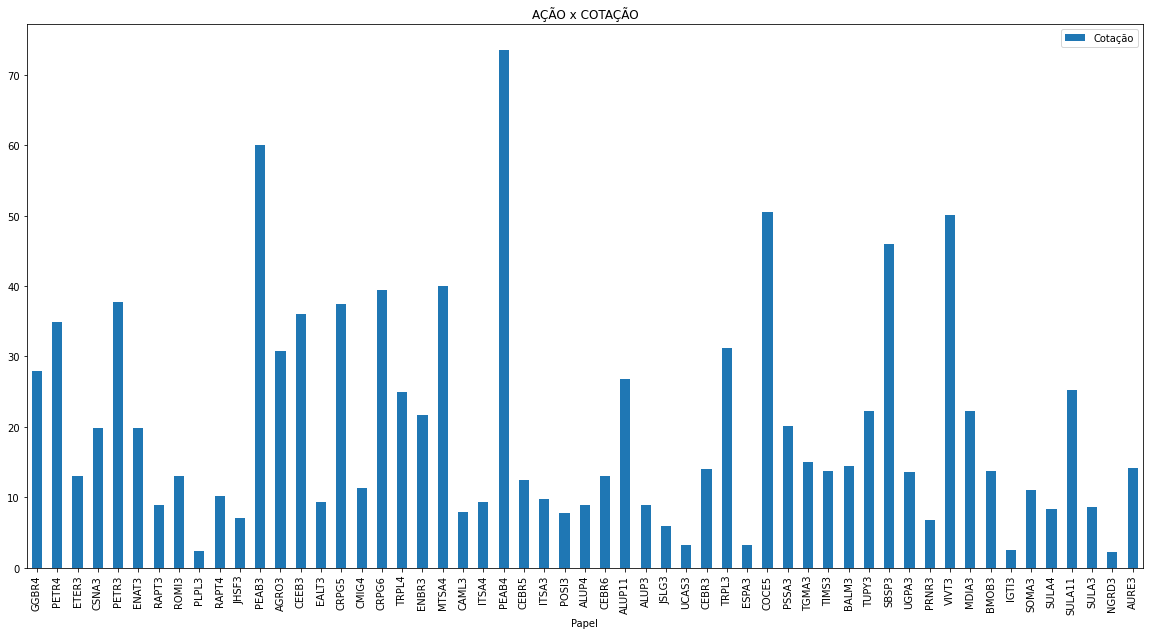

In [71]:
df_preco_vp2.plot(x = 'Papel',y ='Cotação', kind = 'bar', figsize = (20,10), title = 'AÇÃO x COTAÇÃO');
